# CPE element approximation
The behavior of a constant phase element can be approximated by N RC-circuits.

$Z_{RC} = \sum_{k=1}^N\frac{1}{\frac{1}{R_k} + j\omega C_k} \approx \frac{1}{A(j\omega)^{\phi}}$

To build a real CPE Element, either an adjustable inductance or an adjustable capacitance is necessary [1].

[1] S. Holm, T. Holm, und Ø. G. Martinsen, „Simple circuit equivalents for the constant phase element“, PLOS ONE, Bd. 16, Nr. 3, S. e0248786, März 2021, doi: 10.1371/journal.pone.0248786.


In [39]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

N = 10  # Number of RC circuits
R = np.logspace(-4, -1, N)  # R's
C = np.logspace(1, 7, N)  # C's
f_low = -6  # Lower frequency in 1eHz
f_high = 6  # Upper frequency in 1eHz
f_n = 100000  # Sample points
f = np.logspace(f_low, f_high, f_n)  # Frequency array in Hz
w = np.multiply(f, 2*np.pi)  # Pulsatance in 1/s
phi_cpe = 0.33

omega = sp.symbols('omega')
parts = []
for i in range(N):  # Create parts of impedance equations
    parts.append(1/(1/R[i] + 1j*omega*C[i]))
Z_RC = sum(parts)  # Sum all parts up to one expression
Z_RC = sp.lambdify(omega, Z_RC, "numpy")  # Evaluate expression numericaly with numpy 
Z_RC = Z_RC(w)

Z_RCs = []
R0 = 0
for i in range(N): 
    Z_RCs.append(R0 + 1/(1/R[i] + 1j*w*C[i]))
    R0 += R[i]

Z_CPE = 1/(500*(1j*w)**phi_cpe)

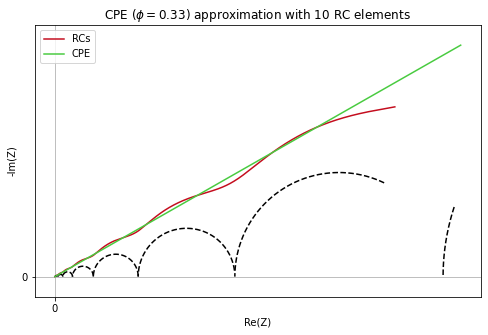

In [40]:
# Compare CPE with approximation of N RC elements
%matplotlib inline
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(np.real(Z_RC), -np.imag(Z_RC), label='RCs', color='#c40d1e')
[ax.plot(np.real(z), -np.imag(z), color='black', linestyle='--') for z in Z_RCs]
ax.plot(np.real(Z_CPE), -np.imag(Z_CPE), label='CPE', color='#49cb40')
ax.set(xticks=[0], yticks=[0], xlabel='Re(Z)', ylabel='-Im(Z)', title=f'CPE ($\phi={phi_cpe}$) approximation with {N} RC elements')
ax.axis('equal')
plt.grid()
ax.legend()